In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as smp
from sympy.plotting import plot
import plotly.graph_objects as go
from numpy import trapz


In [2]:
x,y,a,b,c,alfa,beta, sigma,lambd,kf,A,am,sigmay =smp.symbols('x y a b c α β σ γ k_f A amax σ_y')

### Tensão por Ilgris no furo eliptico


In [88]:
a=1
b=0.004*1+0.096
w=200
t=9
sigma=1
smax=sigma*(1+2*a/b)
smax

21.0

### Tensão segundo o Artigo

In [89]:
sigmay=1+((a**2-2*a*b)*(x-smp.sqrt(x**2-a**2+b**2))*(x**2-a**2+b**2)+a*b**2*(a-b)*x)/((a-b)**2*(x**2-a**2+b**2)*smp.sqrt(x**2-a**2+b**2))
sigmay

(0.009*x + (0.8*x - 0.8*sqrt(x**2 - 0.99))*(x**2 - 0.99))/((0.81*x**2 - 0.8019)*sqrt(x**2 - 0.99)) + 1

In [90]:
Sy=smp.lambdify(x,sigmay)

In [91]:
Sy(a)
#tensão x=a (fim do entalho)

20.999999999999734

In [92]:
X=np.arange(a,5,0.001)
X
# X indo de a ate 5 a cada 0.001

array([1.   , 1.001, 1.002, ..., 4.997, 4.998, 4.999])

Text(0, 0.5, 'σy(mPa)')

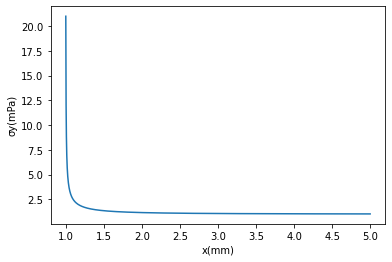

In [93]:
plt.plot(X,Sy(X))
plt.xlabel('x(mm)')
plt.ylabel('σy(mPa)')

In [94]:
Pref=np.zeros(len(X))
S=Sy(X)
P=np.zeros(len(X))
A=np.zeros(len(X))
D=np.zeros(len(X))
for i in range(len(X)-1):
    P[i]=(S[i]+S[i+1])/2*(X[1]-X[0])
    Pref[i]=1*(X[1]-X[0])
    D[i]=(X[i]+X[i+1])/2-X[0]
    A[i]=X[i+1]-X[0]
    
#parametros P,A,D,PRef

In [95]:
P


array([0.01924845, 0.01629503, 0.01421836, ..., 0.00102065, 0.00102064,
       0.        ])

In [96]:
Pref

array([0.001, 0.001, 0.001, ..., 0.001, 0.001, 0.   ])

In [97]:
D

array([5.0000e-04, 1.5000e-03, 2.5000e-03, ..., 3.9975e+00, 3.9985e+00,
       0.0000e+00])

In [98]:
A

array([1.000e-03, 2.000e-03, 3.000e-03, ..., 3.998e+00, 3.999e+00,
       0.000e+00])

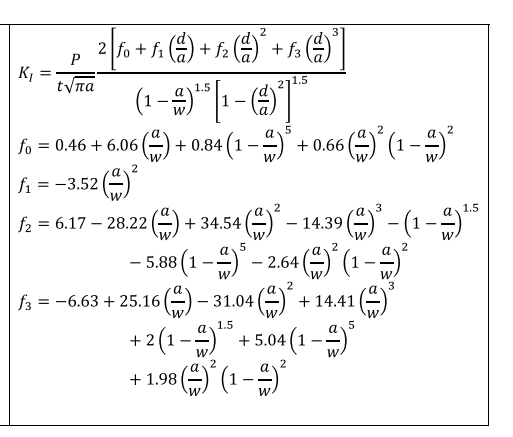

In [99]:
f0=0.46+6.06*(A/w)+0.84*(1-(A/w)**5)+0.66*(A/w)**2*(1-(A/w))**1.5
f1=-3.52*(A/w)**2
f2=6.17-28.22*(A/w)+34.54*(A/w)**2-14.39*(A/w)**3-(1-(A/w))**1.5-5.88*(1-(A/w))**5-2.64*(A/w)**2*(1-(A/(w)))**2
f3=-6.63+25.6*(A/w)-31.04*(A/w)**2+14.41*(A/w)**3+2*(1-(A/(w)))**5+5.04*(1-(A/(w)))**5+1.98*(A/w)**2*(1-(A/(w)))**2

In [100]:
ki=P/(t*np.sqrt(np.pi*A))*2*(f0+f1*(D/A)+f2*(D/A)**2+f3*(D/A)**3)/((1-A/w)**1.5*(1-(D/A)**2)**1.5)

C:\Users\Jonas\AppData\Local\Temp\ipykernel_25508\2521512924.py:1: RuntimeWarning: invalid value encountered in true_divide
  ki=P/(t*np.sqrt(np.pi*A))*2*(f0+f1*(D/A)+f2*(D/A)**2+f3*(D/A)**3)/((1-A/w)**1.5*(1-(D/A)**2)**1.5)


In [101]:
kiref=Pref/(t*np.sqrt(np.pi*A))*2*(f0+f1*(D/A)+f2*(D/A)**2+f3*(D/A)**3)/((1-A/w)**1.5*(1-(D/A)**2)**1.5)

C:\Users\Jonas\AppData\Local\Temp\ipykernel_25508\3856500670.py:1: RuntimeWarning: invalid value encountered in true_divide
  kiref=Pref/(t*np.sqrt(np.pi*A))*2*(f0+f1*(D/A)+f2*(D/A)**2+f3*(D/A)**3)/((1-A/w)**1.5*(1-(D/A)**2)**1.5)


In [102]:
ki

array([ 0.13791309,  0.16949086,  0.20122393, ..., 16.46514301,
       16.4692139 ,         nan])

In [103]:
kiref

array([7.16489364e-03, 1.04013853e-02, 1.41524052e-02, ...,
       1.61320213e+01, 1.61361445e+01,            nan])

In [104]:
kgr=ki/kiref

In [105]:
kgr

array([19.24844922, 16.29502783, 14.21835559, ...,  1.02064972,
        1.0206412 ,         nan])

Text(0, 0.5, 'Kgr(mPa)')

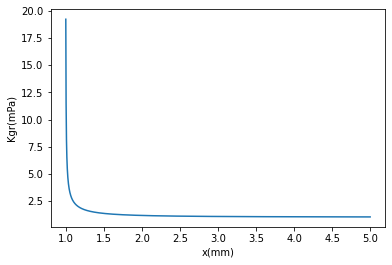

In [106]:
plt.plot(X,kgr)
plt.xlabel('x(mm)')
plt.ylabel('Kgr(mPa)')

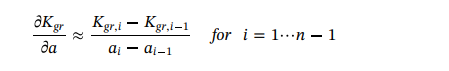

In [119]:
dkgr=np.zeros(len(X))
for i in range(len(X)):
    dkgr[i]=(kgr[i]-kgr[i-1])/(A[i]-A[i-1])

In [120]:
dkgr

array([            nan, -2.95342139e+03, -2.07667224e+03, ...,
       -8.52753023e-03, -8.52219664e-03,             nan])

Text(0, 0.5, "Kgr'(mPa)")

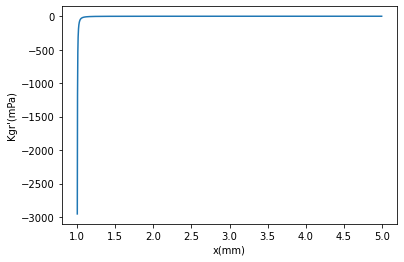

In [121]:
plt.plot(X,dkgr)
plt.xlabel('x(mm)')
plt.ylabel("Kgr'(mPa)")

In [122]:
a0=0.2
gama=2

In [123]:
fi=kgr+2*A*(1+(a0/A)**(gama/2))*dkgr

C:\Users\Jonas\AppData\Local\Temp\ipykernel_25508\4237808484.py:1: RuntimeWarning: divide by zero encountered in true_divide
  fi=kgr+2*A*(1+(a0/A)**(gama/2))*dkgr
C:\Users\Jonas\AppData\Local\Temp\ipykernel_25508\4237808484.py:1: RuntimeWarning: invalid value encountered in multiply
  fi=kgr+2*A*(1+(a0/A)**(gama/2))*dkgr


In [124]:
fi[0:200].round(1)

array([        nan, -1.1769e+03, -8.2890e+02, -6.1560e+02, -4.7560e+02,
       -3.7890e+02, -3.0930e+02, -2.5750e+02, -2.1800e+02, -1.8710e+02,
       -1.6250e+02, -1.4260e+02, -1.2620e+02, -1.1260e+02, -1.0110e+02,
       -9.1400e+01, -8.3100e+01, -7.5900e+01, -6.9600e+01, -6.4100e+01,
       -5.9300e+01, -5.5000e+01, -5.1200e+01, -4.7800e+01, -4.4700e+01,
       -4.2000e+01, -3.9500e+01, -3.7200e+01, -3.5100e+01, -3.3200e+01,
       -3.1500e+01, -2.9900e+01, -2.8400e+01, -2.7100e+01, -2.5800e+01,
       -2.4600e+01, -2.3500e+01, -2.2500e+01, -2.1600e+01, -2.0700e+01,
       -1.9900e+01, -1.9100e+01, -1.8400e+01, -1.7700e+01, -1.7000e+01,
       -1.6400e+01, -1.5800e+01, -1.5300e+01, -1.4800e+01, -1.4300e+01,
       -1.3800e+01, -1.3400e+01, -1.3000e+01, -1.2600e+01, -1.2200e+01,
       -1.1800e+01, -1.1500e+01, -1.1100e+01, -1.0800e+01, -1.0500e+01,
       -1.0200e+01, -1.0000e+01, -9.7000e+00, -9.4000e+00, -9.2000e+00,
       -9.0000e+00, -8.7000e+00, -8.5000e+00, -8.3000e+00, -8.10

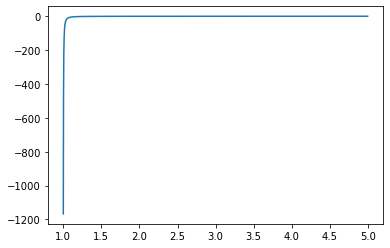

In [113]:
plt.plot(X,fi)

In [114]:
raiz=np.zeros(len(X))
for i in range(len(X)):
    raiz[i]=fi[i]*fi[i+1]

IndexError: index 4000 is out of bounds for axis 0 with size 4000

In [115]:
sol=np.where(raiz<0)[0]
nmax=sol[0]
nmax

352

In [116]:
amax=np.zeros(len(X))
for i in range(len(X)):
    amax[i]=A[i]-fi[i]*(A[1]-A[0])/(fi[i+1]-fi[i])

IndexError: index 4000 is out of bounds for axis 0 with size 4000

In [117]:
Amax=amax[nmax]
Amax

0.35341143873709385

In [85]:
amax[0:250]

array([0.03791356, 0.03939395, 0.04087418, 0.04235424, 0.0438341 ,
       0.04531374, 0.04679312, 0.04827222, 0.04975103, 0.05122951,
       0.05270764, 0.05418539, 0.05566276, 0.0571397 , 0.05861619,
       0.06009221, 0.06156775, 0.06304276, 0.06451724, 0.06599116,
       0.06746448, 0.0689372 , 0.07040929, 0.07188072, 0.07335147,
       0.07482152, 0.07629085, 0.07775943, 0.07922724, 0.08069425,
       0.08216046, 0.08362583, 0.08509034, 0.08655396, 0.08801669,
       0.08947849, 0.09093934, 0.09239923, 0.09385813, 0.09531601,
       0.09677286, 0.09822866, 0.09968338, 0.10113701, 0.10258951,
       0.10404088, 0.10549108, 0.10694011, 0.10838793, 0.10983453,
       0.11127989, 0.11272398, 0.11416679, 0.1156083 , 0.11704847,
       0.11848731, 0.11992477, 0.12136086, 0.12279553, 0.12422878,
       0.12566058, 0.12709092, 0.12851978, 0.12994712, 0.13137295,
       0.13279723, 0.13421995, 0.13564108, 0.13706061, 0.13847852,
       0.13989479, 0.14130941, 0.14272234, 0.14413358, 0.14554

In [86]:
kf=kgr*(1+(a0/Amax)**(gama/2))**(1/gama)/np.sqrt(a0/Amax)

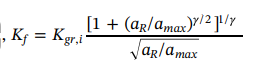

In [87]:
kf[0:100]

array([10.89188793, 10.73900836, 10.59065474, 10.44663774, 10.3067782 ,
       10.17090643, 10.03886162,  9.91049127,  9.78565067,  9.66420242,
        9.54601596,  9.43096721,  9.31893812,  9.20981635,  9.10349492,
        8.9998719 ,  8.89885013,  8.80033695,  8.70424393,  8.61048665,
        8.51898446,  8.42966031,  8.34244052,  8.25725463,  8.17403519,
        8.09271765,  8.01324017,  7.93554351,  7.85957087,  7.7852678 ,
        7.71258204,  7.64146346,  7.57186391,  7.50373717,  7.4370388 ,
        7.37172612,  7.30775807,  7.24509517,  7.18369943,  7.12353428,
        7.06456452,  7.00675625,  6.95007679,  6.89449468,  6.83997955,
        6.78650216,  6.73403426,  6.68254862,  6.63201895,  6.58241987,
        6.53372687,  6.48591627,  6.4389652 ,  6.39285154,  6.34755391,
        6.30305165,  6.25932475,  6.21635387,  6.17412029,  6.13260589,
        6.09179312,  6.05166499,  6.01220503,  5.97339729,  5.93522633,
        5.89767715,  5.86073524,  5.82438649,  5.78861725,  5.75

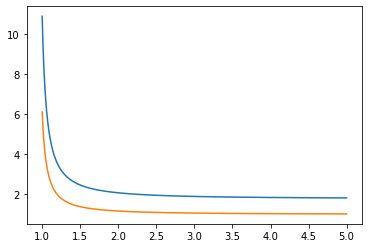

In [41]:
plt.plot(X,kf)
plt.plot(X,kgr)

In [42]:
X[0:100]

array([1.   , 1.001, 1.002, 1.003, 1.004, 1.005, 1.006, 1.007, 1.008,
       1.009, 1.01 , 1.011, 1.012, 1.013, 1.014, 1.015, 1.016, 1.017,
       1.018, 1.019, 1.02 , 1.021, 1.022, 1.023, 1.024, 1.025, 1.026,
       1.027, 1.028, 1.029, 1.03 , 1.031, 1.032, 1.033, 1.034, 1.035,
       1.036, 1.037, 1.038, 1.039, 1.04 , 1.041, 1.042, 1.043, 1.044,
       1.045, 1.046, 1.047, 1.048, 1.049, 1.05 , 1.051, 1.052, 1.053,
       1.054, 1.055, 1.056, 1.057, 1.058, 1.059, 1.06 , 1.061, 1.062,
       1.063, 1.064, 1.065, 1.066, 1.067, 1.068, 1.069, 1.07 , 1.071,
       1.072, 1.073, 1.074, 1.075, 1.076, 1.077, 1.078, 1.079, 1.08 ,
       1.081, 1.082, 1.083, 1.084, 1.085, 1.086, 1.087, 1.088, 1.089,
       1.09 , 1.091, 1.092, 1.093, 1.094, 1.095, 1.096, 1.097, 1.098,
       1.099])

In [43]:
A[0:100]

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  ])

In [44]:
ki[0:100]

array([0.0437854 , 0.06267174, 0.08409487, 0.10559071, 0.1267584 ,
       0.14748869, 0.16774969, 0.18753667, 0.20685614, 0.22571955,
       0.2441406 , 0.26213388, 0.27971424, 0.2968964 , 0.31369474,
       0.33012322, 0.34619531, 0.36192398, 0.37732167, 0.39240032,
       0.40717137, 0.42164576, 0.43583399, 0.44974609, 0.46339168,
       0.47677995, 0.48991972, 0.50281942, 0.51548716, 0.52793066,
       0.54015736, 0.55217439, 0.56398857, 0.57560645, 0.58703433,
       0.59827825, 0.609344  , 0.62023715, 0.63096305, 0.64152686,
       0.65193351, 0.66218777, 0.67229421, 0.68225725, 0.69208111,
       0.70176989, 0.71132751, 0.72075778, 0.73006434, 0.73925072,
       0.74832031, 0.7572764 , 0.76612213, 0.77486056, 0.78349464,
       0.79202721, 0.80046102, 0.80879873, 0.81704289, 0.82519598,
       0.83326041, 0.84123849, 0.84913246, 0.85694449, 0.86467667,
       0.87233106, 0.87990959, 0.88741419, 0.8948467 , 0.9022089 ,
       0.90950253, 0.91672927, 0.92389073, 0.9309885 , 0.93802

In [118]:
kf[nmax]

2.7842404033844463

In [46]:
dkgr[0:100]

array([-85.77601363, -83.23664849, -80.80350003, -78.47087806,
       -76.23346199, -74.08627271, -72.02464698, -70.04421389,
       -68.14087348, -66.31077703, -64.550309  , -62.85607053,
       -61.22486421, -59.65368007, -58.13968269, -56.68019938,
       -55.27270921, -53.91483287, -52.60432341, -51.33905753,
       -50.11702766, -48.93633453, -47.7951803 , -46.69186226,
       -45.62476684, -44.59236422, -43.59320317, -42.62590632,
       -41.68916575, -40.78173891, -39.90244472, -39.05016005,
       -38.22381637, -37.4223966 , -36.64493225, -35.89050065,
       -35.15822244, -34.44725913, -33.75681093, -33.08611459,
       -32.4344415 , -31.80109576, -31.18541255, -30.58675643,
       -30.00451982, -29.43812159, -28.88700569, -28.35063988,
       -27.82851452, -27.32014146, -26.82505296, -26.34280068,
       -25.87295477, -25.41510292, -24.96884956, -24.53381502,
       -24.10963482, -23.69595894, -23.29245113, -22.89878827,
       -22.51465982, -22.13976715, -21.77382308, -21.41

In [47]:
sum(ki[0:nmax])/sum(kiref[0:nmax])

1.8226744780108393

In [48]:
sum(P[0:10000])


4.897689793355526

In [49]:
pacum=np.zeros(len(X))
prefacum=np.zeros(len(X))
for i in range(len(X)):
    pacum=sum(P[0:i])
    prefacum=sum(Pref[0:i])

In [50]:
tt

NameError: name 'tt' is not defined

In [ ]:
P[0:200].round(5)

In [ ]:
kif=sum(P)/(t*np.sqrt(np.pi*A))*2*(f0+f1*(D/A)+f2*(D/A)**2+f3*(D/A)**3)/((1-A/w)**1.5*(1-(D/A)**2)**1.5)

In [ ]:
kif

In [ ]:
sumP=np.zeros(len(X))
sumPr=np.zeros(len(X))
for i in range(len(X)):
    sumP[i]=sum(P[0:i])
    sumPr[i]=sum(Pref[0:i])
sumPr[0:100]

In [ ]:
kif=sumP/(t*np.sqrt(np.pi*A))*2*(f0+f1*(D/A)+f2*(D/A)**2+f3*(D/A)**3)/((1-A/w)**1.5*(1-(D/A)**2)**1.5)

In [ ]:
kifr=sumPr/(t*np.sqrt(np.pi*A))*2*(f0+f1*(D/A)+f2*(D/A)**2+f3*(D/A)**3)/((1-A/w)**1.5*(1-(D/A)**2)**1.5)

In [ ]:
kgrf=kif/kifr

In [ ]:
plt.plot(X,kgrf)

In [ ]:
kgrf[0:200].round(2)

In [ ]:
kf[nmax]